## ESMA 3016
## Edgar Acuna
### Lab14: Distribucion Poisson 
#### Octubre 2020

$$P[X=k]=\frac{e^{-\lambda}{\lambda^k}}{k!},$$

para k=0,1,.....

In [3]:
from scipy.stats import binom,poisson
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Ejemplo1: El numero de errores tipograficos en un libro tiene una distribucion Poisson con un promedio de  4 errores por pagina

a) Cual es la probabilidad de que una pagina cualquiera del libro hayan 2 errores

b) CUal es la probailidad de que no haya mas de 5 errores en una pagina de libro

c) Si se encuentran mas de 6 errroes en una pagina del libro, esta pagina debe reescribirse totalmentecual es la probabilidad de que esto ocurra?

Sol:

In [4]:
poisson.pmf(2,4)

0.14652511110987343

In [5]:
#b
poisson.cdf(5,4)

0.7851303870304052

In [6]:
#c
1-poisson.cdf(6,4)

0.11067397840257365

In [7]:
#Generando una muestra de 1000 valores de una Poisson  con lambda=4 
a=poisson.rvs(4,size=1000)

In [8]:
#Hallando las frecuencias relativas de la muestra generada
unique_elements, counts_elements = np.unique(a, return_counts=True)
prob_sim=counts_elements/float(1000)
prob_sim

array([0.013, 0.086, 0.142, 0.217, 0.181, 0.154, 0.101, 0.063, 0.022,
       0.016, 0.003, 0.002])

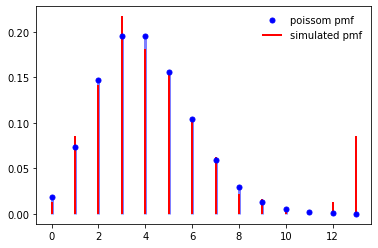

In [9]:
#Plot para comparar las probabilidades exactas de una poisson con las probabilidades simuladas
x=np.arange(0,14)
fig, ax = plt.subplots(1, 1)
ax.plot(x, poisson.pmf(x,4), 'bo', ms=5, label='poissom pmf')
ax.vlines(x, 0, poisson.pmf(x,4), colors='b', lw=3, alpha=0.5)
ax.vlines(x, 0, prob_sim, colors='r', linestyles='-', lw=2,label='simulated pmf')
ax.legend(loc='best', frameon=False)

Ejemplo2: Los clientes llegan a un restaurante a razon de 15 por hora. En una hora cualquiera

a)Cual es la probabilidad de que lleguen exactamente 10 clientes

b)Cual es la probabilidad de que lleguen no mas de 5 clientes?

c)Cual es la probabilidad de que lleguen por lo menos 8 clientes?

d)Cual es la probabilidad de que en las proximas 4 horas lleguen entre 40 y 70 clientes?

Solucion

In [10]:
#a
poisson.pmf(10,15)

0.04861075082960534

In [11]:
#b
poisson.cdf(5,15)

0.0027924293327009145

In [12]:
#c
1-poisson.cdf(7,15)

0.9819978068521692

In [13]:
#d P(40<=X<=70) en 4 horas
poisson.cdf(70,60)-poisson.cdf(39,60)

0.9072651364302438

### Prueba experimental de que una binomial con n grande y p pequeno se aproxima a una Poisson con $\lambda=n*p$

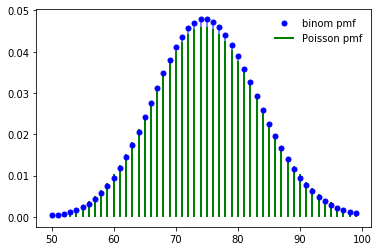

In [14]:
x=np.arange(50,100)
binom.pmf(x,1000,.075)
poisson.pmf(x,75)
#Haciendo una comparacion grafica
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x,1000,.075), 'bo', ms=5, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x,1000,.075), colors='b', lw=2, alpha=0.5)
ax.vlines(x, 0, poisson.pmf(x,75), colors='g', linestyles='-', lw=2,label='Poisson pmf')
ax.legend(loc='best', frameon=False)

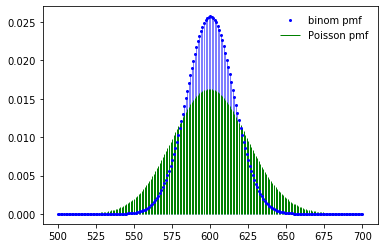

In [15]:
#Mostrando graficamente que la aproximacion no es tan buena si p es grande
x=np.arange(500,701)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x,1000,.6), 'bo', ms=2, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x,1000,.6), colors='b', lw=1, alpha=0.5)
ax.vlines(x, 0, poisson.pmf(x,600), colors='g', linestyles='-', lw=1,label='Poisson pmf')
ax.legend(loc='best', frameon=False)

### Ejemplo de aplicacion de la aproximacion de la binomial a la Poisson

In [16]:
#Valor exacto: Binomial con n=400 y p=1/365
1-binom.cdf(2,400,1/365)

0.09850825486213888

In [17]:
#Valor aproximado por una Poisson con lambda=440/365
1-poisson.cdf(2,400/365)

0.09875749444254511